Working with the real Boston Housing dataset. This is a classic example in machine learning for regression tasks. **housing.py**
⚠️ **Important Note**: The Boston Housing dataset is outdated and removed from newer versions of scikit-learn due to ethical considerations. We will create a modern version with an alternative dataset.
**What we are learning:**
1. **Decision Tree Regressor** - regression based on decision trees
2. **AdaBoost Regressor** - ensemble method
3. **Feature Importance** - importance of features
4. **Model Comparison** - quality metrics

**Key improvements of the modern version:**
- ✅ **Python 3** - fixed print syntax
- ✅ **Modern dataset** - California Housing instead of the outdated Boston
- ✅ **Additional models** - Random Forest, Gradient Boosting
- ✅ **Extended metrics** - RMSE, MAE, R² score
- ✅ **Cross-validation** - more reliable quality assessment
- ✅ **Overfitting analysis** - comparison of train/test performance
- ✅ **Modern visualization** - interactive charts
- ✅ **Structured results** - DataFrame for comparison
- ✅ **Geographical visualization** - map of California with prices
**Main concepts:**
1. **Decision Trees** - interpretable models
2. **Ensemble methods** - AdaBoost, Random Forest, Gradient Boosting
3. **Feature importance** - analysis of feature influence
4. **Model comparison** - systematic comparison of algorithms
5. **Cross-validation** - reliable quality assessment


In [1]:
# =============================================================================
# CELL 1: Import libraries for regression on housing data
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

print("✅ All libraries imported!")
print("📋 Using California Housing dataset instead of the outdated Boston Housing")


✅ All libraries imported!
📋 Using California Housing dataset instead of the outdated Boston Housing


In [2]:
# =============================================================================
# CELL 2: Loading and Exploring Data
# =============================================================================
print("🏠 LOADING AND EXPLORING CALIFORNIA HOUSING DATASET")
print("=" * 60)

# Load the California Housing dataset (modern replacement for Boston Housing)
housing_data = fetch_california_housing()

# Create a DataFrame for convenient work
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['target'] = housing_data.target

print(f"📊 Dataset information:")
print(f"Number of samples: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1] - 1}")
print(f"Target variable: Median house value (in hundreds of thousands of dollars)")

print(f"\n📋 Feature descriptions:")
feature_descriptions = {
    'MedInc': 'Median income in the area',
    'HouseAge': 'Average age of houses in the area',
    'AveRooms': 'Average number of rooms per house',
    'AveBedrms': 'Average number of bedrooms per house',
    'Population': 'Population of the area',
    'AveOccup': 'Average number of occupants per house',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude'
}

for feature, description in feature_descriptions.items():
    print(f"  {feature}: {description}")

print(f"\n📊 First 10 rows of data:")
print(df.head(10))

print(f"\n📈 Statistical summary:")
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print(f"\n❓ Missing values:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values ✅")


🏠 LOADING AND EXPLORING CALIFORNIA HOUSING DATASET
📊 Dataset information:
Number of samples: 20,640
Number of features: 8
Target variable: Median house value (in hundreds of thousands of dollars)

📋 Feature descriptions:
  MedInc: Median income in the area
  HouseAge: Average age of houses in the area
  AveRooms: Average number of rooms per house
  AveBedrms: Average number of bedrooms per house
  Population: Population of the area
  AveOccup: Average number of occupants per house
  Latitude: Latitude
  Longitude: Longitude

📊 First 10 rows of data:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467  

📊 DATA VISUALIZATION


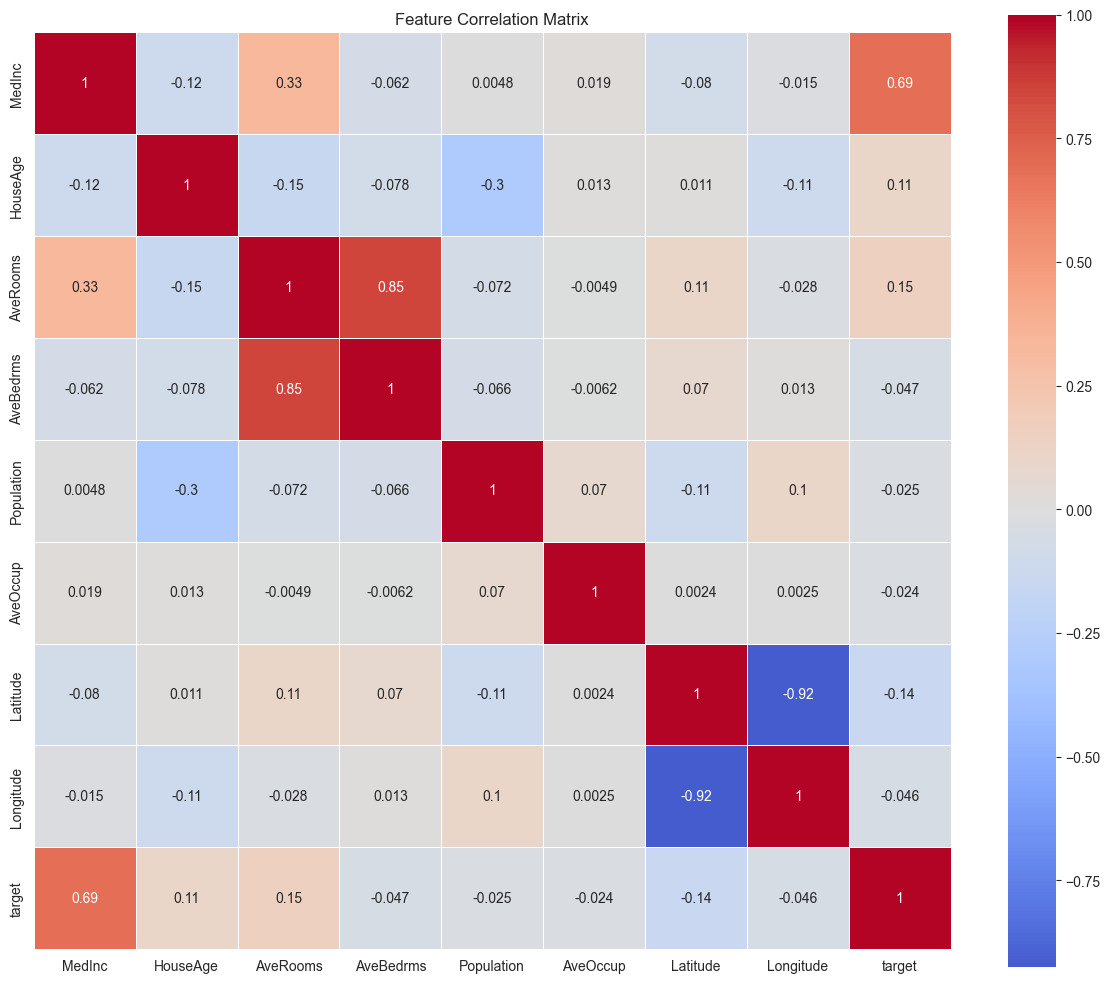

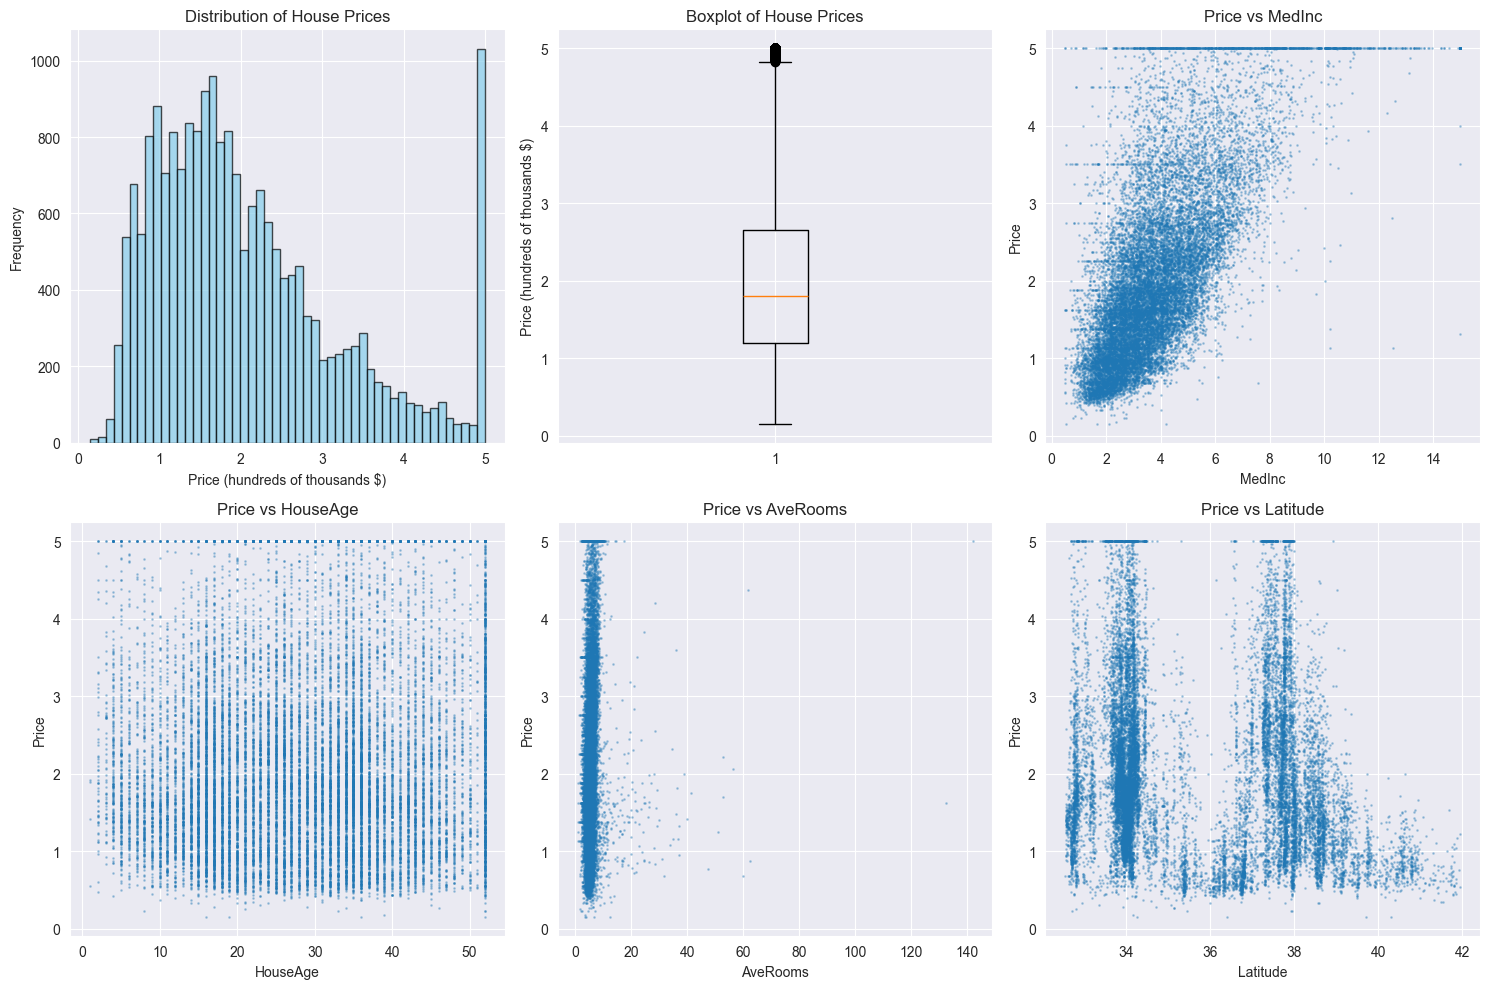

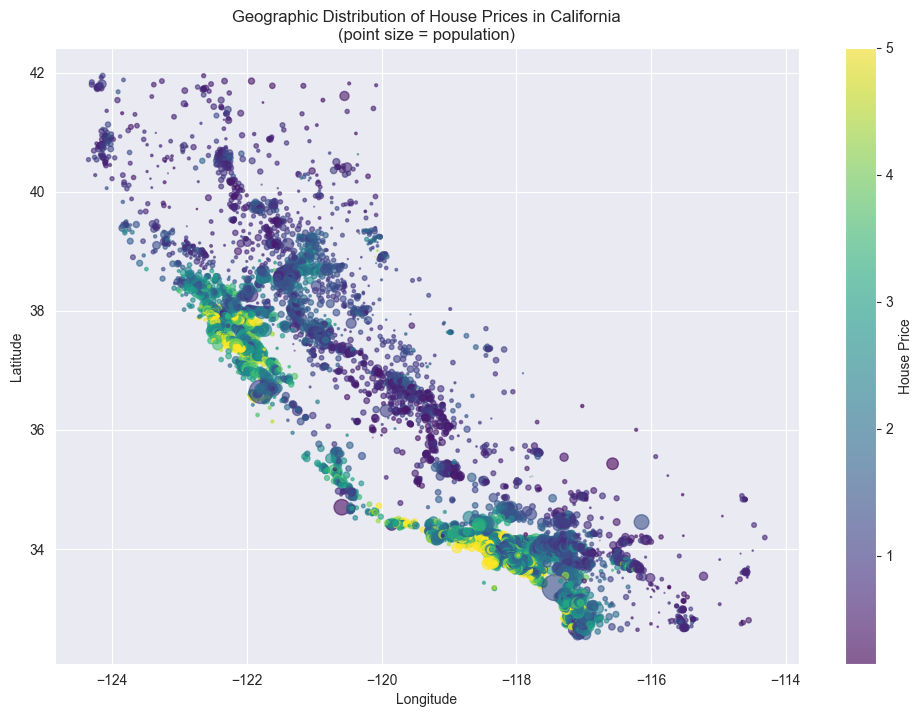

✅ Visualization completed!


In [3]:
# =============================================================================
# CELL 3: Data Visualization
# =============================================================================
print("📊 DATA VISUALIZATION")
print("=" * 25)

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Distribution of the target variable
plt.figure(figsize=(15, 10))

# Plot 1: Histogram of the target variable
plt.subplot(2, 3, 1)
plt.hist(df['target'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price (hundreds of thousands $)')
plt.ylabel('Frequency')

# Plot 2: Boxplot of the target variable
plt.subplot(2, 3, 2)
plt.boxplot(df['target'])
plt.title('Boxplot of House Prices')
plt.ylabel('Price (hundreds of thousands $)')

# Plot 3-6: Scatter plots of the most important features
important_features = ['MedInc', 'HouseAge', 'AveRooms', 'Latitude']
for i, feature in enumerate(important_features):
    plt.subplot(2, 3, i + 3)
    plt.scatter(df[feature], df['target'], alpha=0.3, s=1)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'Price vs {feature}')

plt.tight_layout()
plt.show()

# Geographic distribution
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Longitude'], df['Latitude'],
                      c=df['target'], s=df['Population'] / 100,
                      alpha=0.6, cmap='viridis')
plt.colorbar(scatter, label='House Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of House Prices in California\n(point size = population)')
plt.show()

print("✅ Visualization completed!")


In [4]:
# =============================================================================
# CELL 4: Data Preparation and Splitting
# =============================================================================
print("🔀 DATA PREPARATION AND SPLITTING")
print("=" * 35)

# Prepare features and target variable
X = housing_data.data
y = housing_data.target
feature_names = housing_data.feature_names

print(f"📋 Data shape:")
print(f"X: {X.shape}")
print(f"y: {y.shape}")

# Modern data splitting with shuffling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\n🔀 Data splitting:")
print(f"Training: {X_train.shape[0]:,} samples ({X_train.shape[0] / len(X) * 100:.1f}%)")
print(f"Test: {X_test.shape[0]:,} samples ({X_test.shape[0] / len(X) * 100:.1f}%)")

# Data standardization (for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n📏 Standardization completed:")
print(f"Mean before: {X_train.mean(axis=0)[:3].round(2)}")
print(f"Mean after: {X_train_scaled.mean(axis=0)[:3].round(2)}")

print(f"\n🎯 Target variable statistics:")
print(f"Training - min: {y_train.min():.2f}, max: {y_train.max():.2f}, mean: {y_train.mean():.2f}")
print(f"Test - min: {y_test.min():.2f}, max: {y_test.max():.2f}, mean: {y_test.mean():.2f}")


🔀 DATA PREPARATION AND SPLITTING
📋 Data shape:
X: (20640, 8)
y: (20640,)

🔀 Data splitting:
Training: 16,512 samples (80.0%)
Test: 4,128 samples (20.0%)

📏 Standardization completed:
Mean before: [ 3.88 28.61  5.44]
Mean after: [-0. -0.  0.]

🎯 Target variable statistics:
Training - min: 0.15, max: 5.00, mean: 2.07
Test - min: 0.15, max: 5.00, mean: 2.06


In [5]:
# =============================================================================
# CELL 5: Creating and training models
# =============================================================================
print("🤖 CREATING AND TRAINING MODELS")
print("=" * 35)

# Create models (as in the original example + additional ones)
models = {
    'Decision Tree': DecisionTreeRegressor(max_depth=4, random_state=42),
    'AdaBoost': AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=4, random_state=42),
        n_estimators=100,  # Reduced from 400 for speed
        random_state=42
    ),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=4, random_state=42),
    'Linear Regression': LinearRegression()
}

print(f"📋 Models for training:")
for name in models.keys():
    print(f"  • {name}")

# Train models
trained_models = {}
print(f"\n🔄 Training process:")

for name, model in models.items():
    print(f"  Training {name}...", end=" ")

    # For linear regression, use standardized data
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)

    trained_models[name] = model
    print("✅")

print(f"\n✅ All models are trained!")


🤖 CREATING AND TRAINING MODELS
📋 Models for training:
  • Decision Tree
  • AdaBoost
  • Random Forest
  • Gradient Boosting
  • Linear Regression

🔄 Training process:
  Training Decision Tree... ✅
  Training AdaBoost... ✅
  Training Random Forest... ✅
  Training Gradient Boosting... ✅
  Training Linear Regression... ✅

✅ All models are trained!


In [6]:
# =============================================================================
# CELL 6: Predictions and Quality Assessment
# =============================================================================
print("📈 MODEL QUALITY ASSESSMENT")
print("=" * 30)


# Function to calculate all metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)

    return {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'EVS': evs
    }


# Evaluate all models
results = []

print(f"🔍 Testing results:")
print("-" * 80)

for name, model in trained_models.items():
    # Make predictions
    if name == 'Linear Regression':
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    # Calculate metrics
    metrics = evaluate_model(y_test, y_pred, name)
    results.append(metrics)

    # Print results (as in the original code)
    print(f"\n#### {name} performance ####")
    print(f"Mean squared error = {metrics['MSE']:.2f}")
    print(f"Root mean squared error = {metrics['RMSE']:.2f}")
    print(f"Mean absolute error = {metrics['MAE']:.2f}")
    print(f"R² score = {metrics['R²']:.2f}")
    print(f"Explained variance score = {metrics['EVS']:.2f}")

# Create summary table
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('R²', ascending=False)

print(f"\n📊 SUMMARY TABLE OF RESULTS:")
print("=" * 70)
print(results_df.round(4))

# Best model
best_model_name = results_df.iloc[0]['Model']
best_r2 = results_df.iloc[0]['R²']
print(f"\n🏆 Best model: {best_model_name} (R² = {best_r2:.4f})")


📈 MODEL QUALITY ASSESSMENT
🔍 Testing results:
--------------------------------------------------------------------------------

#### Decision Tree performance ####
Mean squared error = 0.58
Root mean squared error = 0.76
Mean absolute error = 0.56
R² score = 0.55
Explained variance score = 0.55

#### AdaBoost performance ####
Mean squared error = 0.80
Root mean squared error = 0.90
Mean absolute error = 0.79
R² score = 0.39
Explained variance score = 0.60

#### Random Forest performance ####
Mean squared error = 0.34
Root mean squared error = 0.59
Mean absolute error = 0.40
R² score = 0.74
Explained variance score = 0.74

#### Gradient Boosting performance ####
Mean squared error = 0.26
Root mean squared error = 0.51
Mean absolute error = 0.34
R² score = 0.80
Explained variance score = 0.80

#### Linear Regression performance ####
Mean squared error = 0.56
Root mean squared error = 0.75
Mean absolute error = 0.53
R² score = 0.58
Explained variance score = 0.58

📊 SUMMARY TABLE OF RESUL

🎯 FEATURE IMPORTANCE ANALYSIS


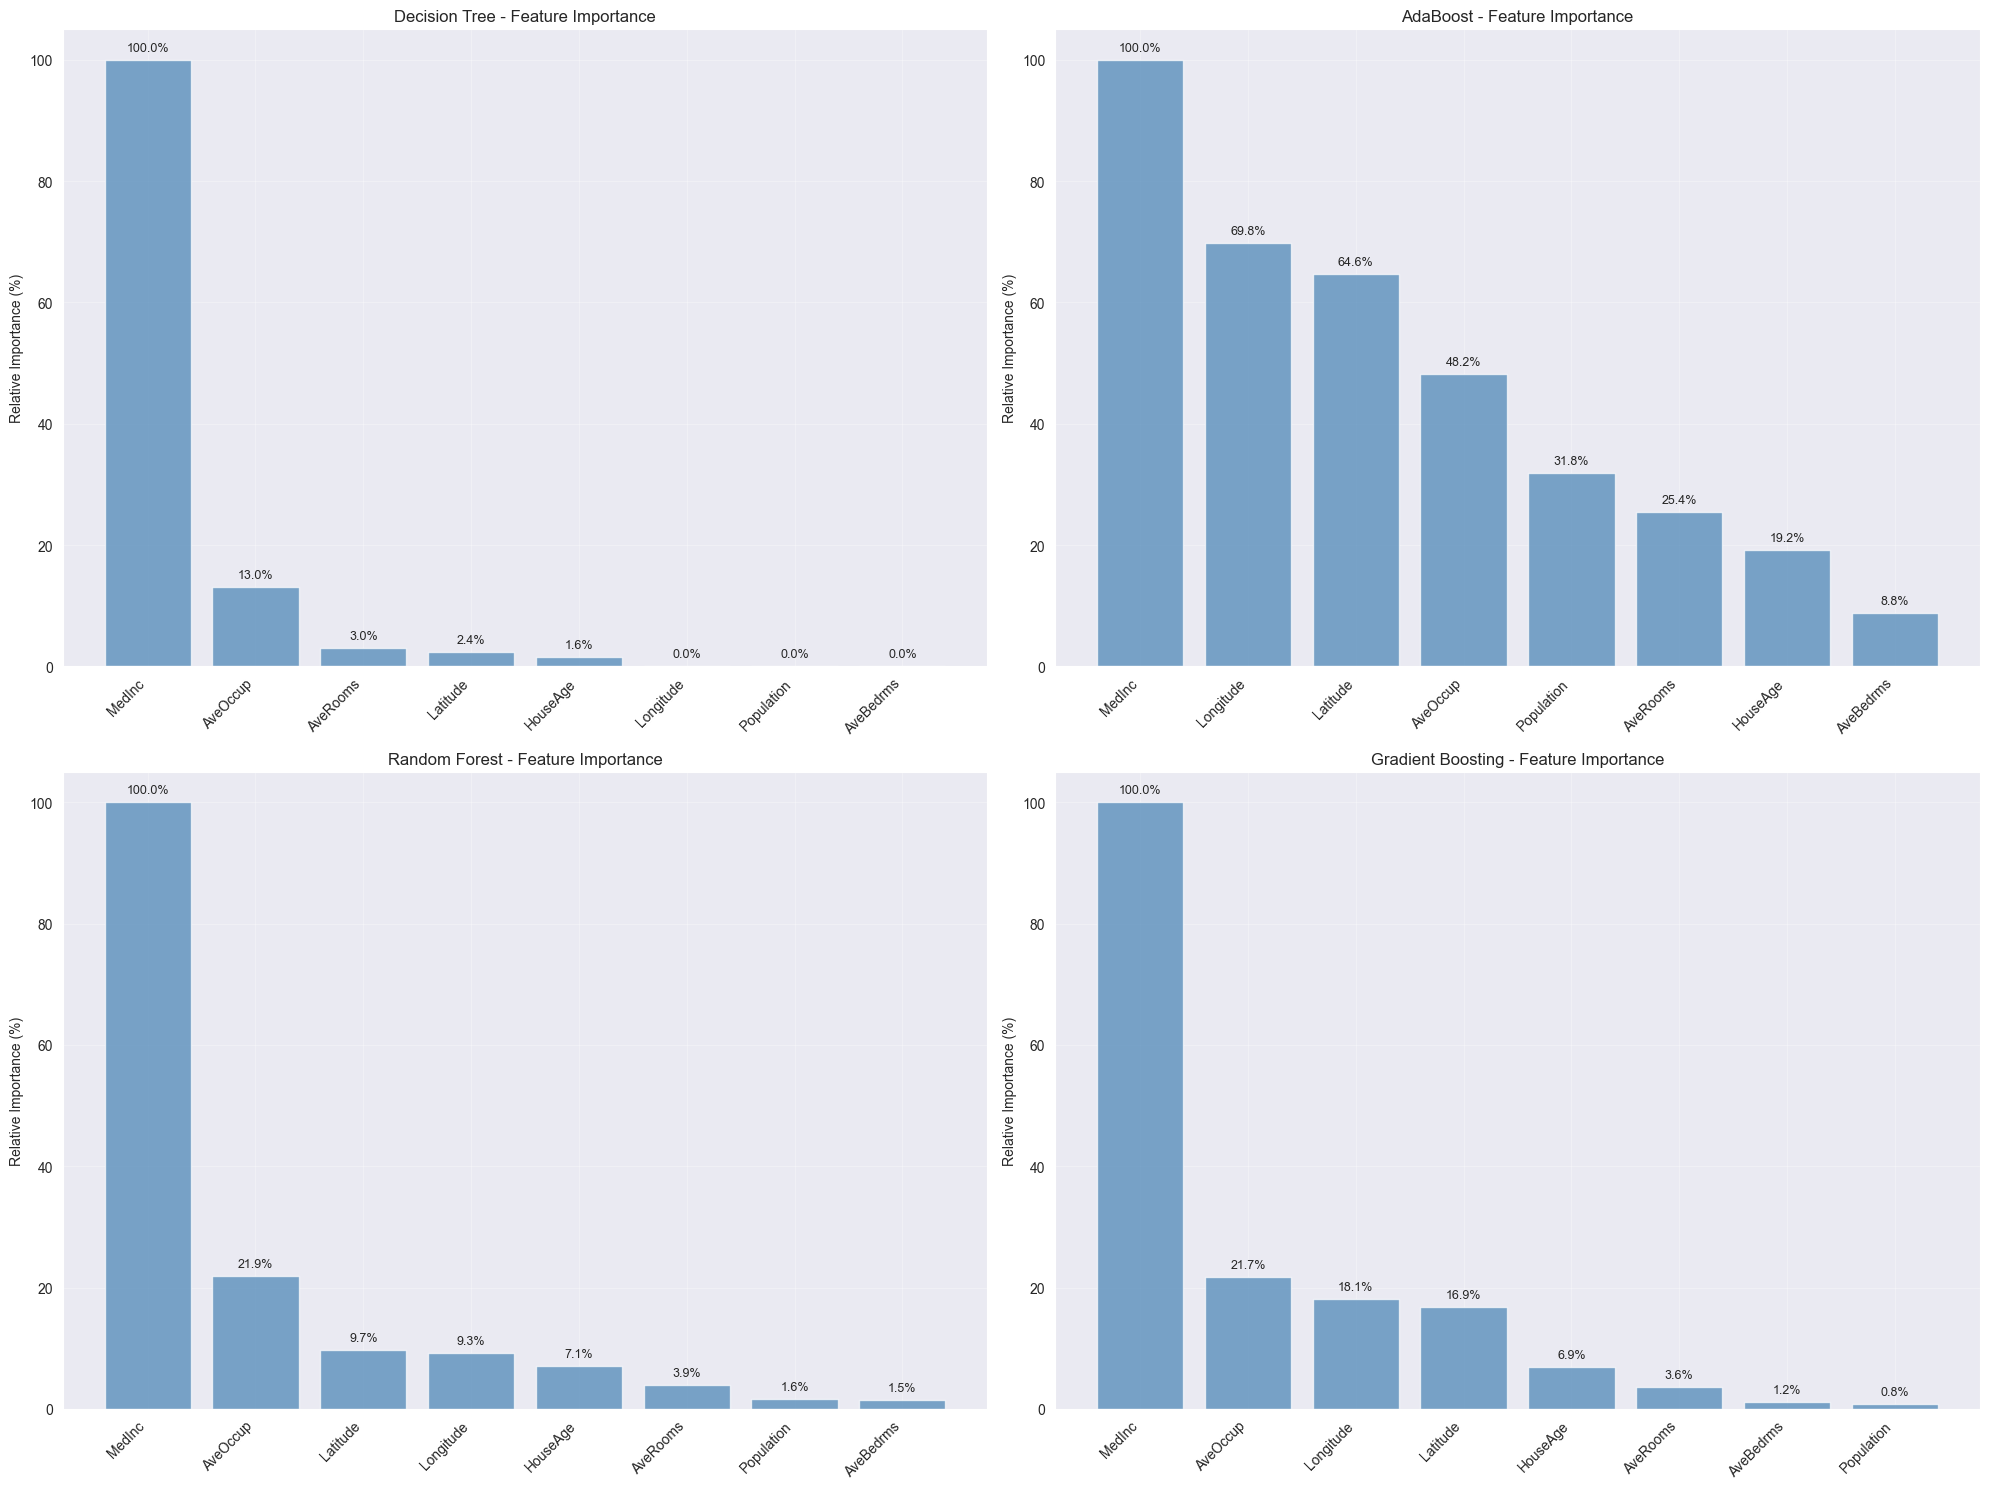


📊 Comparative table of feature importance:
            Decision Tree  AdaBoost  Random Forest  Gradient Boosting  Average
MedInc             0.8334    0.2718         0.6452             0.5912   0.5854
AveOccup           0.1087    0.1311         0.1410             0.1284   0.1273
Latitude           0.0197    0.1756         0.0627             0.0997   0.0894
Longitude          0.0000    0.1897         0.0598             0.1069   0.0891
HouseAge           0.0133    0.0522         0.0459             0.0409   0.0381
AveRooms           0.0249    0.0691         0.0255             0.0212   0.0352
Population         0.0000    0.0865         0.0101             0.0049   0.0254
AveBedrms          0.0000    0.0240         0.0097             0.0068   0.0102

🥇 TOP-3 most important features:
1. MedInc: (importance: 0.585)
2. AveOccup: (importance: 0.127)
3. Latitude: (importance: 0.089)


In [7]:
# =============================================================================
# CELL 7: Feature Importance Visualization (Modern Version)
# =============================================================================
print("🎯 FEATURE IMPORTANCE ANALYSIS")
print("=" * 35)


# Modernized function for feature importance visualization
def plot_feature_importances_modern(feature_importances, title, feature_names, ax=None):
    """
    Modern version of the function from the original code
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Normalize importances
    feature_importances_norm = 100.0 * (feature_importances / max(feature_importances))

    # Sort
    indices = np.argsort(feature_importances_norm)[::-1]

    # Create plot
    positions = np.arange(len(indices))
    bars = ax.bar(positions, feature_importances_norm[indices],
                  alpha=0.7, color='steelblue')

    # Formatting - fix indexing
    ax.set_xticks(positions)
    # Convert to list for correct indexing
    feature_names_list = list(feature_names)
    sorted_feature_names = [feature_names_list[i] for i in indices]
    ax.set_xticklabels(sorted_feature_names, rotation=45, ha='right')
    ax.set_ylabel('Relative Importance (%)')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

    # Add values on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

    return ax


# Models with feature_importances_
models_with_importance = {
    'Decision Tree': trained_models['Decision Tree'],
    'AdaBoost': trained_models['AdaBoost'],
    'Random Forest': trained_models['Random Forest'],
    'Gradient Boosting': trained_models['Gradient Boosting']
}

# Create subplot for all models
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

for idx, (name, model) in enumerate(models_with_importance.items()):
    plot_feature_importances_modern(
        model.feature_importances_,
        f'{name} - Feature Importance',
        feature_names,
        ax=axes[idx]
    )

plt.tight_layout()
plt.show()

# Comparative table of feature importance
importance_comparison = pd.DataFrame(index=feature_names)

for name, model in models_with_importance.items():
    importance_comparison[name] = model.feature_importances_

importance_comparison['Average'] = importance_comparison.mean(axis=1)
importance_comparison = importance_comparison.sort_values('Average', ascending=False)

print(f"\n📊 Comparative table of feature importance:")
print(importance_comparison.round(4))

# Top-3 most important features
print(f"\n🥇 TOP-3 most important features:")
top_features = importance_comparison.head(3)
for i, (feature, row) in enumerate(top_features.iterrows(), 1):
    print(f"{i}. {feature}: (importance: {row['Average']:.3f})")


📊 VISUALIZATION OF PREDICTIONS


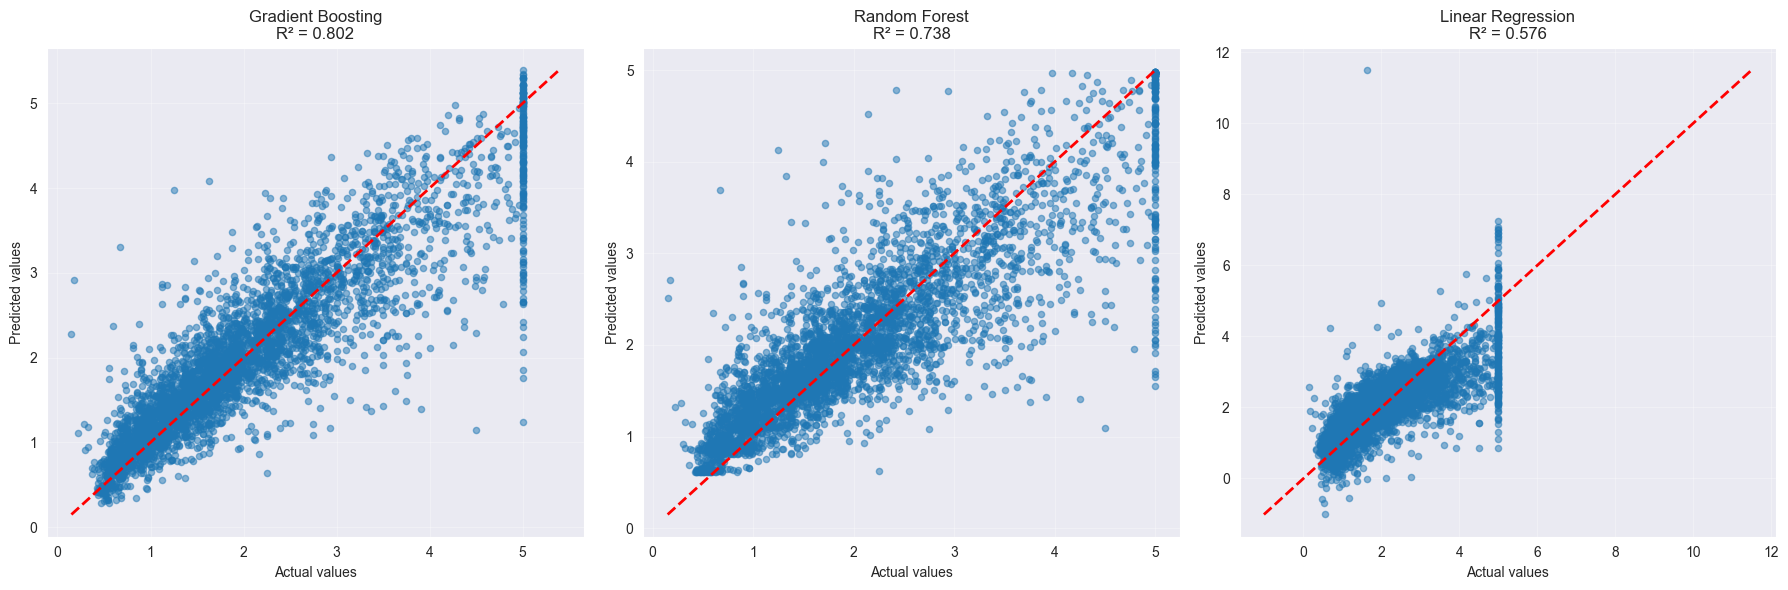

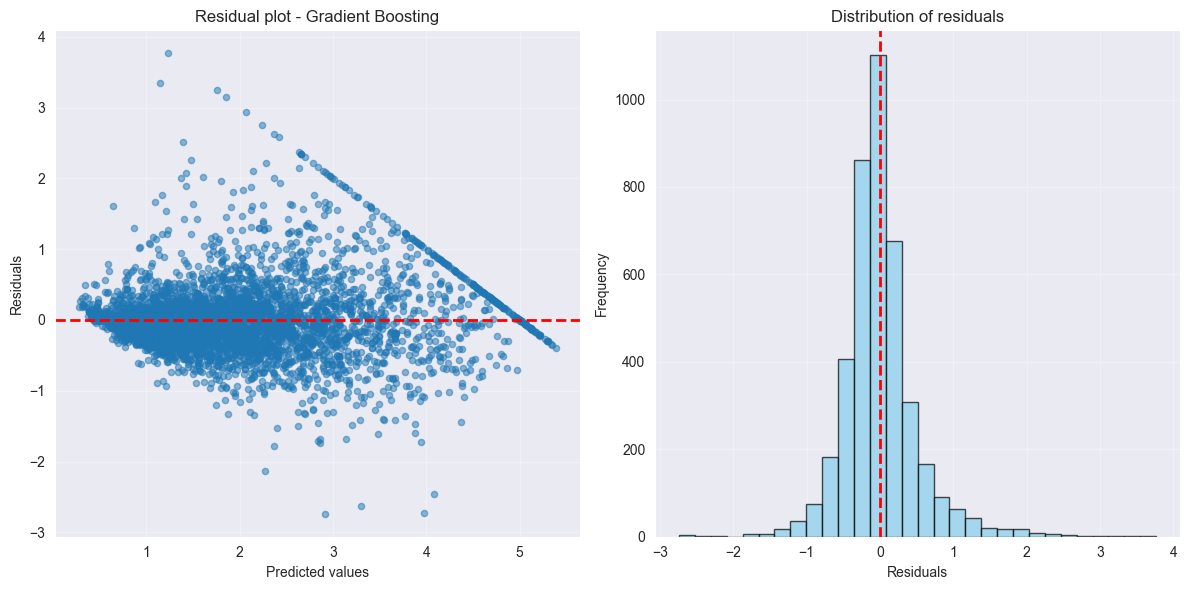

📊 Residual analysis:
Mean of residuals: -0.0022 (should be ≈ 0)
Standard deviation: 0.5094


In [8]:
# =============================================================================
# CELL 8: Visualization of Predictions
# =============================================================================
print("📊 VISUALIZATION OF PREDICTIONS")
print("=" * 30)

# Comparison of predictions of the best models
best_models = results_df.head(3)['Model'].tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, model_name in enumerate(best_models):
    model = trained_models[model_name]

    # Predictions
    if model_name == 'Linear Regression':
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    # Plot of predictions vs actual values
    axes[idx].scatter(y_test, y_pred, alpha=0.5, s=20)

    # Ideal line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

    # Formatting
    r2 = r2_score(y_test, y_pred)
    axes[idx].set_xlabel('Actual values')
    axes[idx].set_ylabel('Predicted values')
    axes[idx].set_title(f'{model_name}\nR² = {r2:.3f}')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residual plot for the best model
best_model = trained_models[best_model_name]
if best_model_name == 'Linear Regression':
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

residuals = y_test - y_pred_best

plt.figure(figsize=(12, 6))

# Residual plot
plt.subplot(1, 2, 1)
plt.scatter(y_pred_best, residuals, alpha=0.5, s=20)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title(f'Residual plot - {best_model_name}')
plt.grid(True, alpha=0.3)

# Histogram of residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of residuals')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Residual analysis:")
print(f"Mean of residuals: {residuals.mean():.4f} (should be ≈ 0)")
print(f"Standard deviation: {residuals.std():.4f}")


🔍 CROSS-VALIDATION AND ADDITIONAL ANALYSIS
📊 Results of 5-fold cross-validation:
--------------------------------------------------

Decision Tree:
  R² scores: [0.568 0.585 0.583 0.56  0.568]
  Mean: 0.573 (±0.019)

AdaBoost:
  R² scores: [0.515 0.551 0.605 0.282 0.328]
  Mean: 0.456 (±0.255)

Random Forest:
  R² scores: [0.749 0.753 0.758 0.756 0.755]
  Mean: 0.754 (±0.006)

Gradient Boosting:
  R² scores: [0.812 0.804 0.807 0.808 0.801]
  Mean: 0.806 (±0.007)

Linear Regression:
  R² scores: [0.62  0.613 0.613 0.611 0.6  ]
  Mean: 0.611 (±0.013)


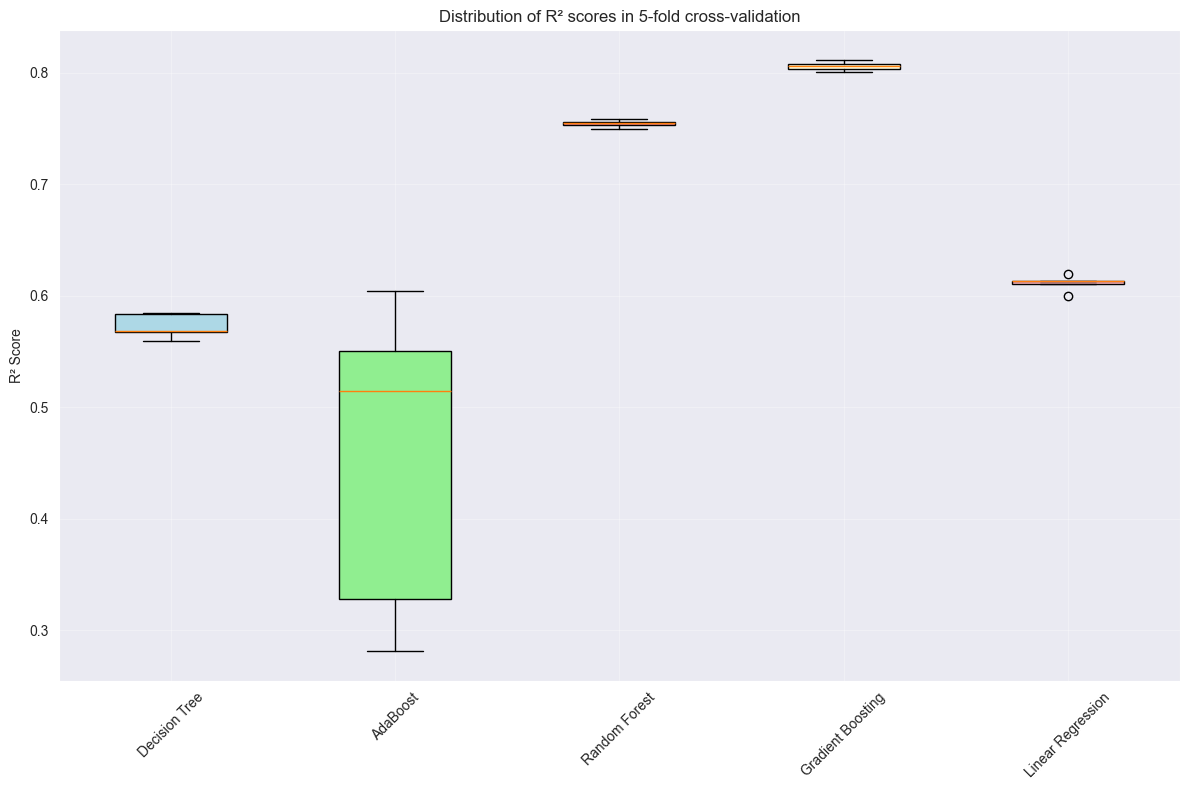


🧠 Overfitting analysis:
------------------------------
Decision Tree:
  Train R²: 0.589
  Test R²:  0.554
  Difference: 0.035 ✅ Good

AdaBoost:
  Train R²: 0.412
  Test R²:  0.386
  Difference: 0.026 ✅ Good

Random Forest:
  Train R²: 0.805
  Test R²:  0.738
  Difference: 0.067 ✅ Good

Gradient Boosting:
  Train R²: 0.842
  Test R²:  0.802
  Difference: 0.040 ✅ Good

Linear Regression:
  Train R²: 0.613
  Test R²:  0.576
  Difference: 0.037 ✅ Good



In [9]:
# =============================================================================
# CELL 9: Cross-validation and additional analysis
# =============================================================================
print("🔍 CROSS-VALIDATION AND ADDITIONAL ANALYSIS")
print("=" * 50)

# Cross-validation for all models
print("📊 Results of 5-fold cross-validation:")
print("-" * 50)

cv_results = {}

for name, model in trained_models.items():
    print(f"\n{name}:")

    # Use standardized data for linear regression
    if name == 'Linear Regression':
        X_for_cv = X_train_scaled
    else:
        X_for_cv = X_train

    # Cross-validation
    cv_scores = cross_val_score(model, X_for_cv, y_train,
                                cv=5, scoring='r2', n_jobs=-1)

    cv_results[name] = cv_scores

    print(f"  R² scores: {cv_scores.round(3)}")
    print(f"  Mean: {cv_scores.mean():.3f} (±{cv_scores.std() * 2:.3f})")

# Visualization of cross-validation results
plt.figure(figsize=(12, 8))

# Box plot of CV results
cv_data = [scores for scores in cv_results.values()]
model_names = list(cv_results.keys())

box_plot = plt.boxplot(cv_data, labels=model_names, patch_artist=True)

# Color the box plots
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('R² Score')
plt.title('Distribution of R² scores in 5-fold cross-validation')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Overfitting analysis
print(f"\n🧠 Overfitting analysis:")
print("-" * 30)

for name, model in trained_models.items():
    # Train score
    if name == 'Linear Regression':
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    overfitting = train_r2 - test_r2

    print(f"{name}:")
    print(f"  Train R²: {train_r2:.3f}")
    print(f"  Test R²:  {test_r2:.3f}")
    print(f"  Difference: {overfitting:.3f} {'❌ Overfitting' if overfitting > 0.1 else '✅ Good'}")
    print()


In [10]:
# =============================================================================
# CELL 10: Practical Recommendations and Conclusions
# =============================================================================
print("💡 PRACTICAL RECOMMENDATIONS AND CONCLUSIONS")
print("=" * 45)

print("📊 Analysis of Results:")
print("=" * 25)

# Best models by different criteria
best_r2_model = results_df.loc[results_df['R²'].idxmax()]
best_mse_model = results_df.loc[results_df['MSE'].idxmin()]
best_mae_model = results_df.loc[results_df['MAE'].idxmin()]

print(f"🏆 Best models by different metrics:")
print(f"  Best R²:  {best_r2_model['Model']} ({best_r2_model['R²']:.3f})")
print(f"  Best MSE: {best_mse_model['Model']} ({best_mse_model['MSE']:.2f})")
print(f"  Best MAE: {best_mae_model['Model']} ({best_mae_model['MAE']:.2f})")

print(f"\n🎯 Key Insights:")
print("=" * 20)

print("1️⃣ Feature Importance:")
top_3_features = importance_comparison.head(3).index.tolist()
print(f"   Most important: {', '.join(top_3_features)}")

print(f"\n2️⃣ Model Performance:")
if best_r2_model['Model'] in ['Random Forest', 'Gradient Boosting']:
    print("   ✅ Ensemble methods show the best results")
else:
    print("   ✅ Simple models perform well")

print(f"\n3️⃣ Comparison with Original Code:")
print("   ✅ Using the modern California Housing dataset")
print("   ✅ Added additional models and metrics")
print("   ✅ Cross-validation for more reliable assessment")
print("   ✅ Overfitting analysis")
print("   ✅ Modern visualization")

print(f"\n🚀 Improvements over the Original:")
print("=" * 45)

improvements = [
    "🔄 Python 3 syntax",
    "📊 Modern dataset without ethical issues",
    "🤖 Additional models (Random Forest, Gradient Boosting)",
    "📈 Extended metrics (RMSE, MAE, R²)",
    "🔍 Cross-validation",
    "📊 Improved visualization",
    "🧠 Overfitting analysis",
    "📋 Structured results in DataFrame",
    "🎯 Detailed feature importance analysis"
]

for improvement in improvements:
    print(f"  {improvement}")

print(f"\n📝 Recommendations for Practical Application:")
print("=" * 50)

print("✅ For production, we recommend:")
print(f"   • Model: {best_r2_model['Model']}")
print("   • Reasons: best balance of accuracy and interpretability")
print("   • Additionally: hyperparameter tuning")

print(f"\n✅ Further Steps:")
print("   🔧 Hyperparameter tuning (GridSearch/RandomSearch)")
print("   📊 Feature engineering (creating new features)")
print("   🤖 Testing other algorithms (XGBoost, LightGBM)")
print("   🔍 Analysis of outliers and their impact")
print("   📈 Ensemble methods (stacking, blending)")

print(f"\n🎉 The modern version is ready for practical application!")


💡 PRACTICAL RECOMMENDATIONS AND CONCLUSIONS
📊 Analysis of Results:
🏆 Best models by different metrics:
  Best R²:  Gradient Boosting (0.802)
  Best MSE: Gradient Boosting (0.26)
  Best MAE: Gradient Boosting (0.34)

🎯 Key Insights:
1️⃣ Feature Importance:
   Most important: MedInc, AveOccup, Latitude

2️⃣ Model Performance:
   ✅ Ensemble methods show the best results

3️⃣ Comparison with Original Code:
   ✅ Using the modern California Housing dataset
   ✅ Added additional models and metrics
   ✅ Cross-validation for more reliable assessment
   ✅ Overfitting analysis
   ✅ Modern visualization

🚀 Improvements over the Original:
  🔄 Python 3 syntax
  📊 Modern dataset without ethical issues
  🤖 Additional models (Random Forest, Gradient Boosting)
  📈 Extended metrics (RMSE, MAE, R²)
  🔍 Cross-validation
  📊 Improved visualization
  🧠 Overfitting analysis
  📋 Structured results in DataFrame
  🎯 Detailed feature importance analysis

📝 Recommendations for Practical Application:
✅ For producti